In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import os

#### Importing relevant libraries and setting up directory structure to open and export files more readily.

In [7]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [9]:
insilico = pd.read_excel(processed_dir+'insilico_genetox_predictions_all_TSCA_150221.xlsx')

In [10]:
insilico.head()

,Unnamed: 0,aggregate_study_type,assay_outcome,simple_aggregate
0,DTXSID2020004,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
1,DTXSID7020005,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
2,DTXSID2020006,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
3,DTXSID7020009,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
4,DTXSID6020010,DNA_Ames_CA_MNT_OASIS,0.0,pAmes


In [13]:
insilico.columns = ['dtxsid', 'aggregate_study_type', 'assay_outcome',
       'simple_aggregate']

In [14]:
insilico.shape

(135129, 4)

In [15]:
insilico.dtxsid.nunique()

19623

In [21]:
insilico = insilico.set_index('dtxsid')

In [16]:
genetox_df = pd.read_excel(processed_dir+'genetox_merged_110221_final.xlsx')

In [17]:
genetox_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [18]:
genetox_df.shape

(54805, 35)

In [20]:
genetox_df = genetox_df.set_index('dtxsid')

In [22]:
genetox_final = pd.concat([genetox_df, insilico])

In [23]:
genetox_final.shape

(189934, 34)

In [24]:
genetox_final.head()

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,sex,dose_response,panel_report,glp,guideline,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
dtxsid,,,,,,,,,,,,,,,,,,,,,
DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 100,NaN,with and without,not determined,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
DTXSID7040316,eChemPortal,nickel(2+) dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,bacterial fluctuation assay,negative,0.0,other,other
DTXSID7040316,eChemPortal,nickel(2+) ion dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,bacterial fluctuation assay,negative,0.0,other,other


In [25]:
genetox_final.assay_outcome.unique()

array([ 0.,  1.,  2., nan])

In [26]:
genetox_final = genetox_final.reset_index()
genetox_final.rename(columns = {'index': 'dtxsid'}, inplace = True)

In [27]:
genetox_final.dtxsid.nunique()

23345

In [29]:
genetox_final.head()

,dtxsid,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,...,sex,dose_response,panel_report,glp,guideline,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
0,DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
1,DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 100,NaN,with and without,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
2,DTXSID9024142,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,...,NaN,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,bacterial fluctuation assay,negative,0.0,other,other
3,DTXSID7040316,eChemPortal,nickel(2+) dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,...,NaN,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,bacterial fluctuation assay,negative,0.0,other,other
4,DTXSID7040316,eChemPortal,nickel(2+) ion dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,...,NaN,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,bacterial fluctuation assay,negative,0.0,other,other


In [30]:
calls = {}
for i, group in genetox_final.groupby('dtxsid'):
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        calls[i]='gentox'
    elif ('clastogen', 1) in tuples:
        calls[i]='clastogen'  
    elif ('Ames', 2) in tuples:
        calls[i]='inconclusive'    
    elif ('clastogen', 2) in tuples:
        calls[i]='inconclusive' 
    elif ('Ames', 0) in tuples:
        calls[i]='non gentox'
    elif ('clastogen', 0) in tuples:
        calls[i]='not clastogen'    
    elif ('pAmes', 1) in tuples:
        calls[i]='pred gentox'
    elif ('pclastogen', 1) in tuples:
        calls[i]='pred clastogen'
    elif ('pAmes', 0) in tuples:
        calls[i]='pred non gentox'
    elif ('pclastogen', 0) in tuples:
        calls[i]='pred non clastogen'
    else:
        None

In [31]:
calls_df = pd.DataFrame(list(calls.items()), columns = ['dtxsid', 'Overall_genetox_call'])

In [32]:
calls_df.head()

,dtxsid,Overall_genetox_call
0,DTXSID001000726,pred clastogen
1,DTXSID001003875,pred gentox
2,DTXSID00100498,not clastogen
3,DTXSID001006300,pred gentox
4,DTXSID00100670,non gentox


In [33]:
calls_df['overall_genetox_score'] = calls_df['Overall_genetox_call']

In [34]:
tag_judson = {'pred gentox': 3, np.nan: 0, 'non gentox': 1, 'gentox': 4, 'inconclusive': 2, 'clastogen': 4, 'pred clastogen' :3, 'not clastogen': 1, 'pred non clastogen': 1,'pred non gentox': 1}

In [35]:
calls_df['overall_genetox_score'].replace(tag_judson , inplace = True)

In [36]:
calls_df.shape

(22516, 3)

In [37]:
calls_df.head()

,dtxsid,Overall_genetox_call,overall_genetox_score
0,DTXSID001000726,pred clastogen,3
1,DTXSID001003875,pred gentox,3
2,DTXSID00100498,not clastogen,1
3,DTXSID001006300,pred gentox,3
4,DTXSID00100670,non gentox,1


In [193]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dir+'calls_150221.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
calls_df.to_excel(writer, sheet_name='DeMarini_predictions')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### Filter all the calls made against the actual TSCA set of substances

In [39]:
tsca_all = pd.read_excel(processed_dir+'TSCA_all.xlsx')

In [41]:
tsca_all

(33364, 14)

In [43]:
tsca_lst = tsca_all['DTXSID'].tolist()

In [44]:
len(tsca_lst)

33364

In [45]:
calls_tsca = calls_df[calls_df['dtxsid'].isin(tsca_lst)]

In [47]:
calls_tsca.shape

(20371, 3)

In [49]:
calls_tsca['overall_genetox_score'].value_counts(dropna = False)

1    9507
3    8949
4    1812
2     103
Name: overall_genetox_score, dtype: int64

In [50]:
calls_tsca['overall_genetox_score'].value_counts(dropna = False, normalize = True)

1    0.466693
3    0.439301
4    0.088950
2    0.005056
Name: overall_genetox_score, dtype: float64

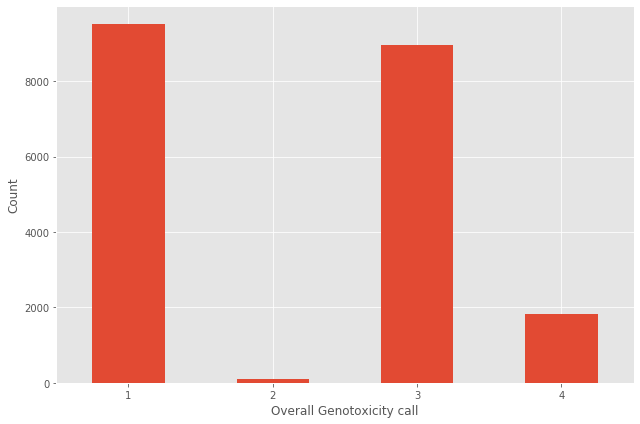

In [52]:
plt.style.use('ggplot')
plt.figure(figsize = (9,6))
calls_tsca.overall_genetox_score.value_counts().sort_index().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(figures_dir+'Figure5_TSCA_scores.png', dpi = 300)

#### Filtered against the POC238 set for which calls could be determined

In [54]:
poc238 = pd.read_excel(processed_dir+'POC238_280419.xlsx')

In [57]:
poc238.dsstox_substance_id.nunique()

238

In [58]:
poc238

,casrn,name,dsstox_substance_id,TSCA_90,TSCA_POC
0,100-00-5,1-Chloro-4-nitrobenzene,DTXSID5020281,NaN,1
1,100-41-4,Ethylbenzene,DTXSID3020596,1.0,1
2,100-42-5,Styrene,DTXSID2021284,1.0,1
3,101-14-4,"4,4-Methylenebis(2-chloroaniline)",DTXSID5020865,1.0,1
4,101-20-2,Triclocarban,DTXSID4026214,NaN,1
...,...,...,...,...,...
233,NOCAS_872421,Lead & Lead Compounds,DTXSID00872421,1.0,1
234,NOCAS_872422,Long-chain chlorinated paraffins (C18-20),DTXSID60872422,1.0,1
235,NOCAS_872423,Medium-chain chlorinated paraffins (C14-17),DTXSID20872423,1.0,1
236,NOCAS_872424,Molybdenum & Molybdenum Compounds,DTXSID80872424,1.0,1


In [59]:
poc238_lst = poc238[poc238['TSCA_POC']==1]['dsstox_substance_id'].tolist()

In [60]:
calls_poc = calls_df[calls_df['dtxsid'].isin(poc238_lst)]

In [61]:
calls_poc['Overall_genetox_call'].value_counts(dropna = False, normalize = False)

gentox             81
non gentox         77
clastogen          33
pred non gentox    10
pred gentox         8
inconclusive        6
pred clastogen      6
not clastogen       4
Name: Overall_genetox_call, dtype: int64

In [63]:
calls_poc.columns

Index(['dtxsid', 'Overall_genetox_call', 'overall_genetox_score'], dtype='object')

In [64]:
calls_poc['overall_genetox_score'].value_counts(dropna = False, normalize = True)

4    0.506667
1    0.404444
3    0.062222
2    0.026667
Name: overall_genetox_score, dtype: float64

In [65]:
calls_poc.shape


(225, 3)

In [66]:
calls_poc['overall_genetox_score'].value_counts(dropna = False, normalize = False)

4    114
1     91
3     14
2      6
Name: overall_genetox_score, dtype: int64

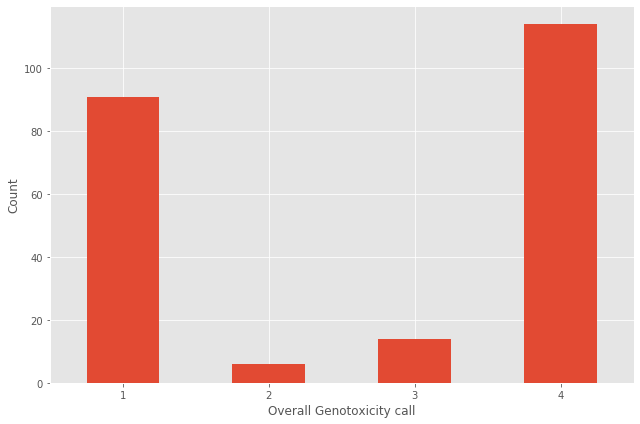

In [68]:
plt.style.use('ggplot')
plt.figure(figsize = (9,6))
calls_poc.overall_genetox_score.value_counts().sort_index().plot.bar()
plt.xlabel('Overall Genotoxicity call')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.savefig(figures_dir+'Figure6_POC_scores.png', dpi = 300)

#### Picking one chemical for interpretation

In [69]:
calls_poc[calls_poc['dtxsid'] == 'DTXSID0020280']

,dtxsid,Overall_genetox_call,overall_genetox_score
145,DTXSID0020280,gentox,4


In [70]:
dtx_spec = genetox_final[genetox_final['dtxsid'] == 'DTXSID0020280']

In [75]:
dtx_spec.shape

(88, 35)

In [81]:
dtx_spec[dtx_spec['simple_aggregate'].isin(['Ames'])]['assay_outcome'].value_counts()

1.0    30
0.0    19
Name: assay_outcome, dtype: int64

In [82]:
dtx_spec[dtx_spec['simple_aggregate'].isin(['clastogen'])]['assay_outcome'].value_counts()

0.0    7
2.0    4
1.0    3
Name: assay_outcome, dtype: int64

In [71]:
dtx_spec[dtx_spec['simple_aggregate']== 'pclastogen']['assay_outcome'].value_counts()

1.0    1
0.0    1
Name: assay_outcome, dtype: int64

In [83]:
dtx_spec[dtx_spec['simple_aggregate']== 'pAmes']['assay_outcome'].value_counts()

1.0    4
0.0    1
Name: assay_outcome, dtype: int64

#### Filter overall TSCA calls to only retain experimental data

In [84]:
expt_calls_df = calls_tsca[calls_tsca.Overall_genetox_call.isin(['non gentox',
       'gentox', 'clastogen','not clastogen', 'non gentox'])]

In [87]:
expt_calls_df.dtxsid.nunique()

6194

In [88]:
expt_ids = expt_calls_df.dtxsid.tolist()

In [89]:
insilico_df = insilico.reset_index()

In [90]:
insilico_df.head()

,dtxsid,aggregate_study_type,assay_outcome,simple_aggregate
0,DTXSID2020004,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
1,DTXSID7020005,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
2,DTXSID2020006,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
3,DTXSID7020009,DNA_Ames_CA_MNT_OASIS,0.0,pAmes
4,DTXSID6020010,DNA_Ames_CA_MNT_OASIS,0.0,pAmes


#### Reprofile the in silico set just on the basis of predicted outcomes

In [92]:
insilico_calls = {}
for i, group in insilico_df.groupby('dtxsid'):
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        insilico_calls[i]='gentox'
    elif ('clastogen', 1) in tuples:
        insilico_calls[i]='clastogen'  
    elif ('Ames', 2) in tuples:
        insilico_calls[i]='inconclusive'    
    elif ('clastogen', 2) in tuples:
        insilico_calls[i]='inconclusive' 
    elif ('Ames', 0) in tuples:
        insilico_insilico_calls[i]='non gentox'
    elif ('clastogen', 0) in tuples:
        insilico_calls[i]='not clastogen'    
    elif ('pAmes', 1) in tuples:
        insilico_calls[i]='pred gentox'
    elif ('pclastogen', 1) in tuples:
        insilico_calls[i]='pred clastogen'
    elif ('pAmes', 0) in tuples:
        insilico_calls[i]='pred non gentox'
    elif ('pclastogen', 0) in tuples:
        insilico_calls[i]='pred non clastogen'
    else:
        None

In [93]:
insilico_calls_df = pd.DataFrame(list(insilico_calls.items()), columns = ['dtxsid', 'overall_call'])

In [95]:
insilico_calls_df.overall_call.unique()

array(['pred clastogen', 'pred gentox', 'pred non gentox'], dtype=object)

In [96]:
tag_pred = {'pred gentox': 4, 'pred non gentox': 1, 'pred clastogen' :4}

In [97]:
preds_df = insilico_calls_df[insilico_calls_df['dtxsid'].isin(expt_ids)]

#### Merge this with the experimental calls from the TSCA set and use standard metrics to evaluate performance

In [99]:
merged_df = pd.merge(preds_df, expt_calls_df, on = 'dtxsid')

In [100]:
merged_df['predicted_score'] = merged_df['overall_call'].map(tag_pred)

In [101]:
tag_pred2 ={4:1, 1:0}

In [102]:
merged_df = merged_df.replace(tag_pred2)

In [103]:
merged_df.overall_genetox_score.value_counts()

0    3636
1    1594
Name: overall_genetox_score, dtype: int64

In [105]:
merged_df.shape

(5230, 5)

In [118]:
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [120]:
print(roc_auc_score(merged_df['overall_genetox_score'], merged_df['predicted_score']))

0.5753202672839429


In [121]:
confusion_matrix(merged_df['overall_genetox_score'], merged_df['predicted_score'])

array([[1394, 2242],
       [ 371, 1223]])

In [130]:
tn, fp, fn, tp =confusion_matrix(merged_df['overall_genetox_score'], merged_df['predicted_score']).ravel()
print(tn,fp, fn,tp)

1394 2242 371 1223


In [122]:
merged_df['overall_genetox_score'].value_counts()

0    3636
1    1594
Name: overall_genetox_score, dtype: int64

In [123]:
pd.crosstab(merged_df['overall_genetox_score'], merged_df['predicted_score'])

predicted_score,0,1
overall_genetox_score,,
0,1394,2242
1,371,1223


In [124]:
tn, fp, fn, tp = pd.crosstab(merged_df['overall_genetox_score'], merged_df['predicted_score']).values.ravel()

In [129]:
print(tn, fp, fn, tp)

1394 2242 371 1223


In [126]:
sens = tp/(tp+fn)
print(sens)

0.7672521957340025


In [127]:
spec = tn/(tn+fp)
print(spec)

0.3833883388338834


In [128]:
print((sens + spec)/2)

0.5753202672839429
